In [1]:
import cvm_inference
import numpy as np
import os.path
import matplotlib.pyplot as plt
import cv2
import os


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Create instance of the inference object

In [2]:
inference = cvm_inference.CVMInference()

VGG16: trainable = False
VGG16: trainable = False
Siamese_FC: dim_reduction  trainable = False
CVMInference object created
loading model...
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
   Model loaded from: ../Model/CVM-NET-I/0/model.ckpt
load model...FINISHED
Test with black images
Test on black images passed


In [3]:
inference.aerial_image_prefix = "../Data/CVUSA/dubai/sat/"
inference.ground_image_prefix = "../Data/CVUSA/dubai/ground/"
num_aerial_imgs = len([name for name in os.listdir(inference.aerial_image_prefix)])
num_ground_imgs = len([name for name in os.listdir(inference.ground_image_prefix)])
print(num_aerial_imgs)
print(num_ground_imgs)

144
4


### Extract decriptors from each satellite patch image

In [4]:
filename = 'dubai_aerial_descriptors.npz'
inference.global_count = 0
inference.num_imgs = num_aerial_imgs

if os.path.isfile(filename):
    print ("Aerial Descriptors file already exists")
else:
    print ("Calculating aerial file descriptors. This might take some time...")
    aerial_descriptors_list = []
    for i in range(inference.num_imgs):
        batch_descriptors = inference.forward(inference.next_images(is_ground = False), is_ground = False)
        print(batch_descriptors.shape)
        
        aerial_descriptors_list.append(batch_descriptors)
    aerial_descriptors = np.vstack([batch for batch in aerial_descriptors_list if batch is not None])
    print(aerial_descriptors.shape)
    np.savez(filename, aerial_descriptors)
    

Calculating aerial file descriptors. This might take some time...
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:t

computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring para

computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
(144, 4096)


### Extract decriptors from ground images

In [5]:

filename = 'dubai_ground_descriptors.npz'
inference.global_count = 0
inference.num_imgs = num_ground_imgs

if os.path.isfile(filename):
    print ("Ground Descriptors file already exists")
else:
    print ("Calculating ground descriptors. This might take some time...")
    ground_descriptors_list = []
    for i in range(inference.num_imgs):
        batch_descriptors = inference.forward(inference.next_images(is_ground = True), is_ground = True)
        print(batch_descriptors.shape)
        
        ground_descriptors_list.append(batch_descriptors)
    ground_descriptors = np.vstack([batch for batch in ground_descriptors_list if batch is not None])
    print(ground_descriptors.shape)
    np.savez(filename, ground_descriptors)

Calculating ground descriptors. This might take some time...
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
INFO:tensorflow:Restoring parameters from ../Model/CVM-NET-I/0/model.ckpt
computing global descriptors...
(1, 4096)
(4, 4096)


## Load descriptors from files if already computed

In [6]:
# Load Sat Descriptors
filename = 'dubai_aerial_descriptors.npz'
if os.path.isfile(filename):
    sat_descriptors = np.load(filename)['arr_0']
    print(sat_descriptors.shape)
    print ("Found satellite descriptors file")
else:
    print ("No satellite descriptors file was found... Matching won't be possible")
    
# Load Ground Descriptors
filename = 'dubai_ground_descriptors.npz'
if os.path.isfile(filename):
    ground_descriptors = np.load(filename)['arr_0']
    print(ground_descriptors.shape)
    print ("Found uav descriptors file")
else:
    print ("No uav descriptors file was found... Matching won't be possible")

(144, 4096)
Found satellite descriptors file
(4, 4096)
Found uav descriptors file


### Load Raw images for visualization

In [7]:
# Load Images for visualization
ground_images = inference.load_images_raw(is_ground = True, num_images = num_ground_imgs)
satellite_images = inference.load_images_raw(is_ground = False, num_images = num_aerial_imgs)

## Define softmax function used to calculate match probability

In [8]:
# Softmax Function
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

### Calculate descriptor distance and use it to calculate match probability (best match = smallest distance)

In [9]:
# Calculate match probability and sort dictionary so we know the best match in each case
euclidean_distances_list = []
for ground_descriptor in ground_descriptors:
    euclidian_distances = []
    for sat_descriptor in sat_descriptors:
        dist = np.linalg.norm(sat_descriptor-ground_descriptor)
        #print(dist)
        if dist == 0.0:
            dist = 0.1
        euclidian_distances.append(1/dist)
    indexes = np.arange(sat_descriptors.shape[0])
    distances_dict = dict(zip(indexes.T, softmax(euclidian_distances)))
    sorted_distances_dict = sorted(distances_dict.items(), key = lambda x:-x[1])
    sorted_distances_dict
    euclidean_distances_list.append(sorted_distances_dict)
print(np.array(euclidean_distances_list).shape)

(4, 144, 2)


## Show best 3 matches for each ground image

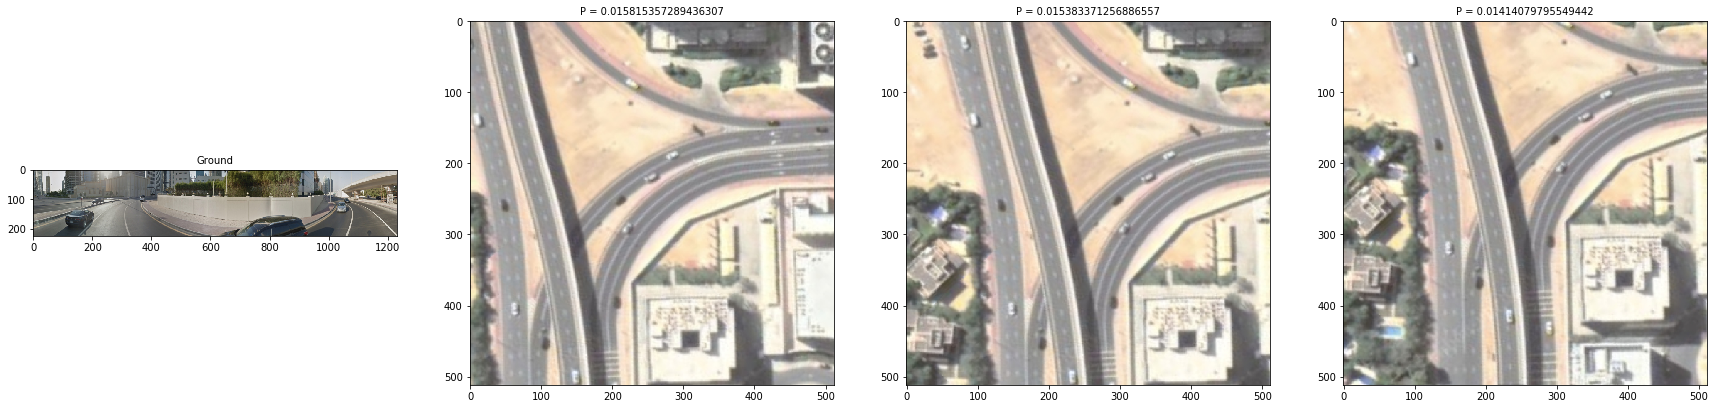

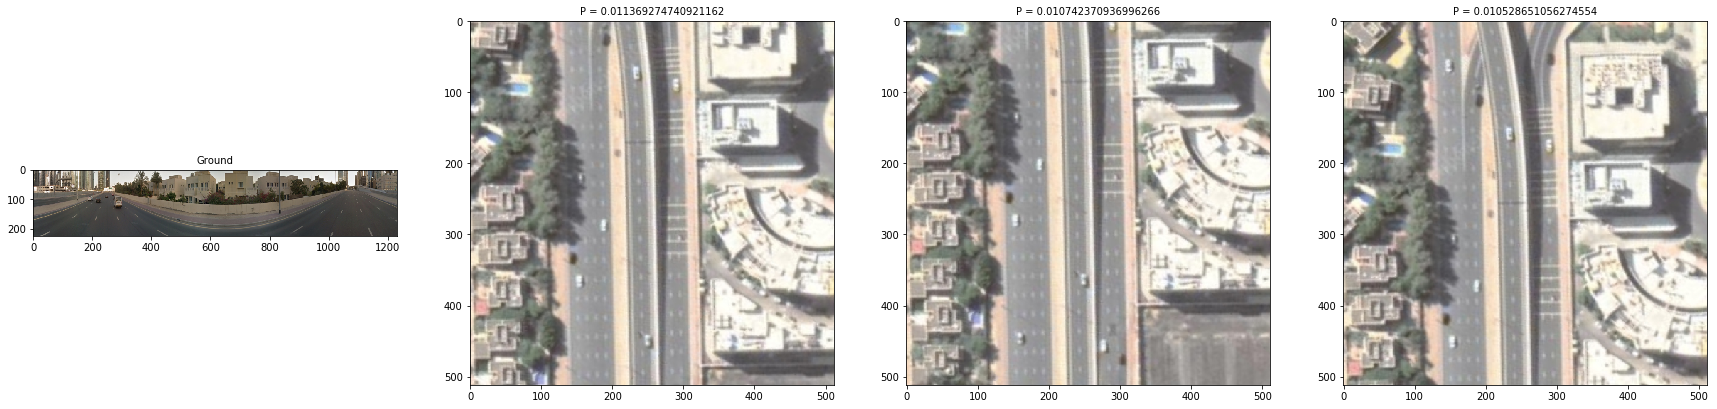

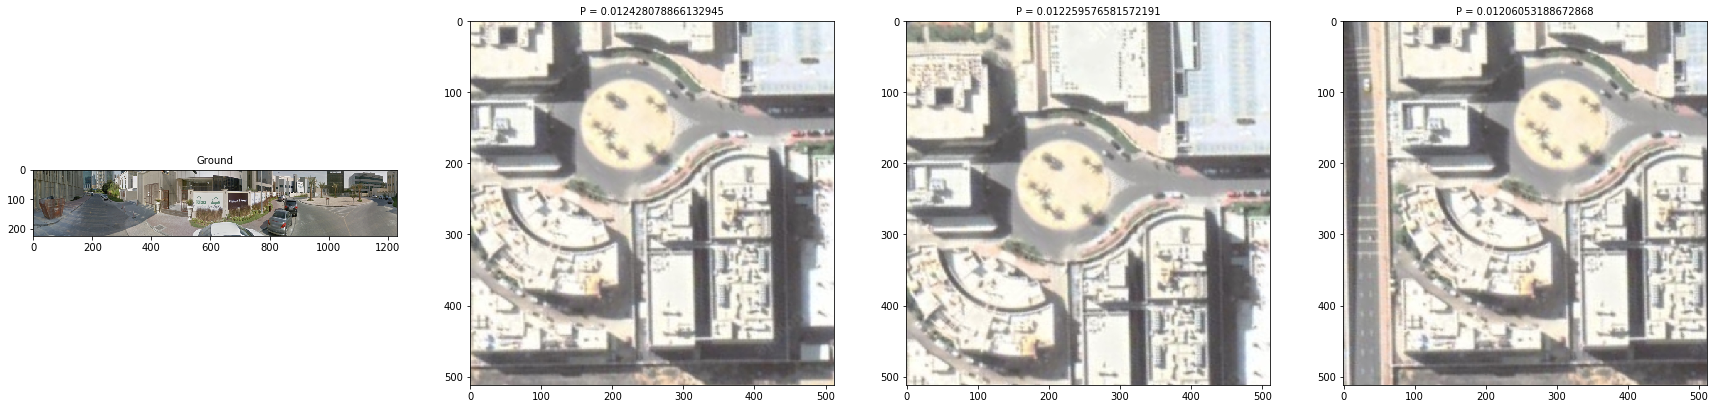

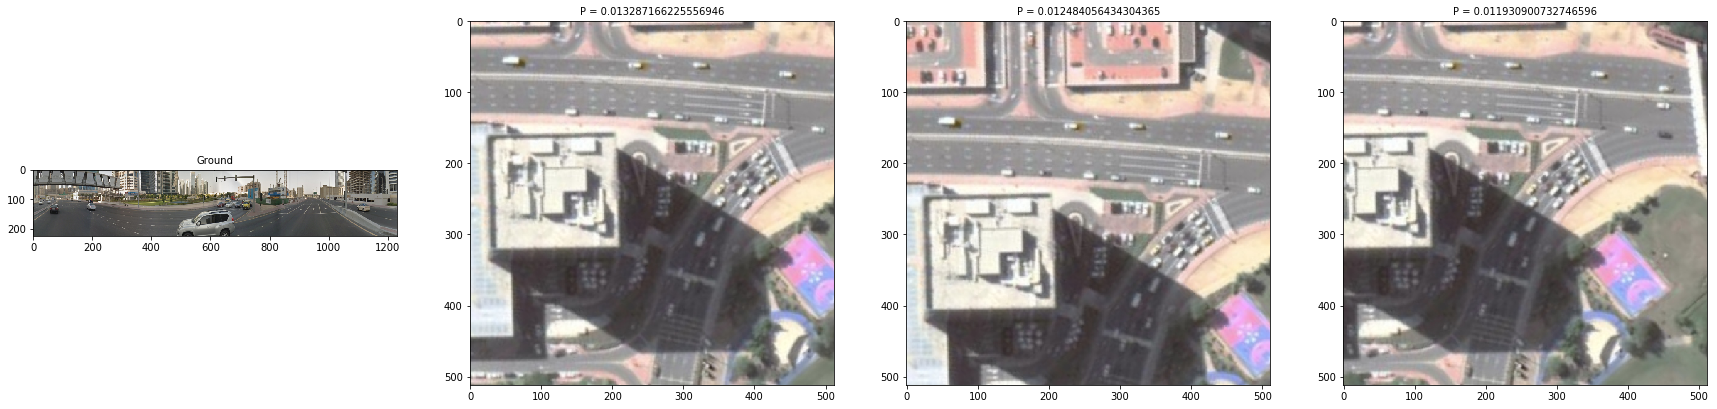

In [10]:
# Show matches
i = 0
for euclidian_dist in euclidean_distances_list:
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30,10))
    ax1.imshow(ground_images[i])
    ax1.set_title('Ground', fontsize=10)
    ax2.imshow(satellite_images[euclidian_dist[0][0]])
    ax2.set_title('P = ' + str(euclidian_dist[0][1]), fontsize=10)
    ax3.imshow(satellite_images[euclidian_dist[1][0]])
    ax3.set_title('P = ' + str(euclidian_dist[1][1]), fontsize=10)
    ax4.imshow(satellite_images[euclidian_dist[2][0]])
    ax4.set_title('P = ' + str(euclidian_dist[2][1]), fontsize=10)
    plt.show()
    i += 1

## Let's see matches on the map

In [11]:
import math
PATCH_DIM = 600
STRIDE = 100
# Read aerial map and perform same operations as when the patches were generated
map_img = cv2.imread("../Data/CVUSA/dubai/big_map3.png",1)
map_img = cv2.cvtColor(map_img, cv2.COLOR_BGR2RGB)
map_resized = cv2.resize(map_img, (1800,1800), interpolation=cv2.INTER_AREA) 
h, w , _ = map_resized.shape

#Calculate number of rows and cols in which the map was dicretized when the patches
# where generated
num_cols = int((w - PATCH_DIM)/STRIDE)
num_rows = int((h - PATCH_DIM)/STRIDE)


In [12]:
# Draw the frame corresponding to the patch
def draw_frame(image, row, col):
    img = image.copy()
    b = 8
    c=(0,255,0)
    thickness = 10
    width, height, _ = img.shape
    p1 = (col*STRIDE , row*STRIDE)
    p2 = (col*STRIDE , row*STRIDE + PATCH_DIM)
    p3 = (col*STRIDE + PATCH_DIM, row*STRIDE + PATCH_DIM)
    p4 = (col*STRIDE + PATCH_DIM, row*STRIDE)
    cv2.line(img, p1, p2, c, thickness)
    cv2.line(img, p2, p3, c, thickness)
    cv2.line(img, p3, p4, c, thickness)
    cv2.line(img, p4, p1, c, thickness)
    return img

1
60
64
22


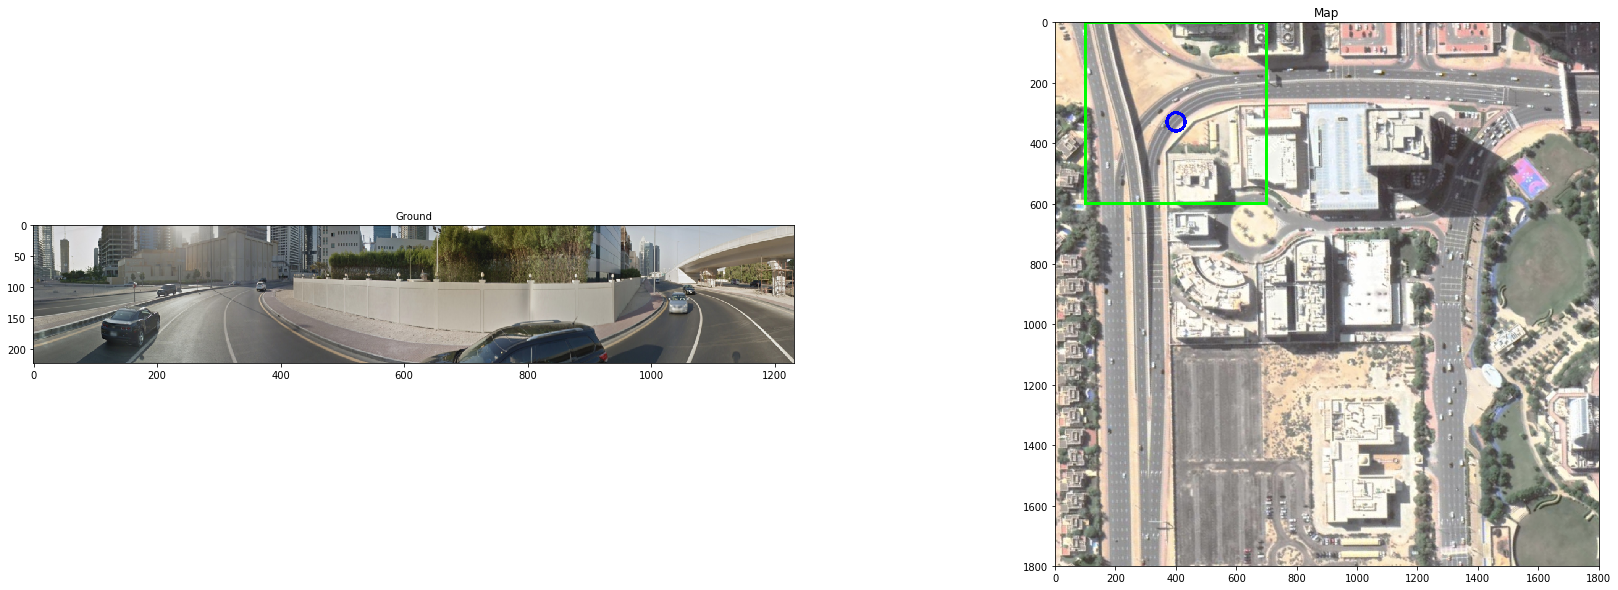

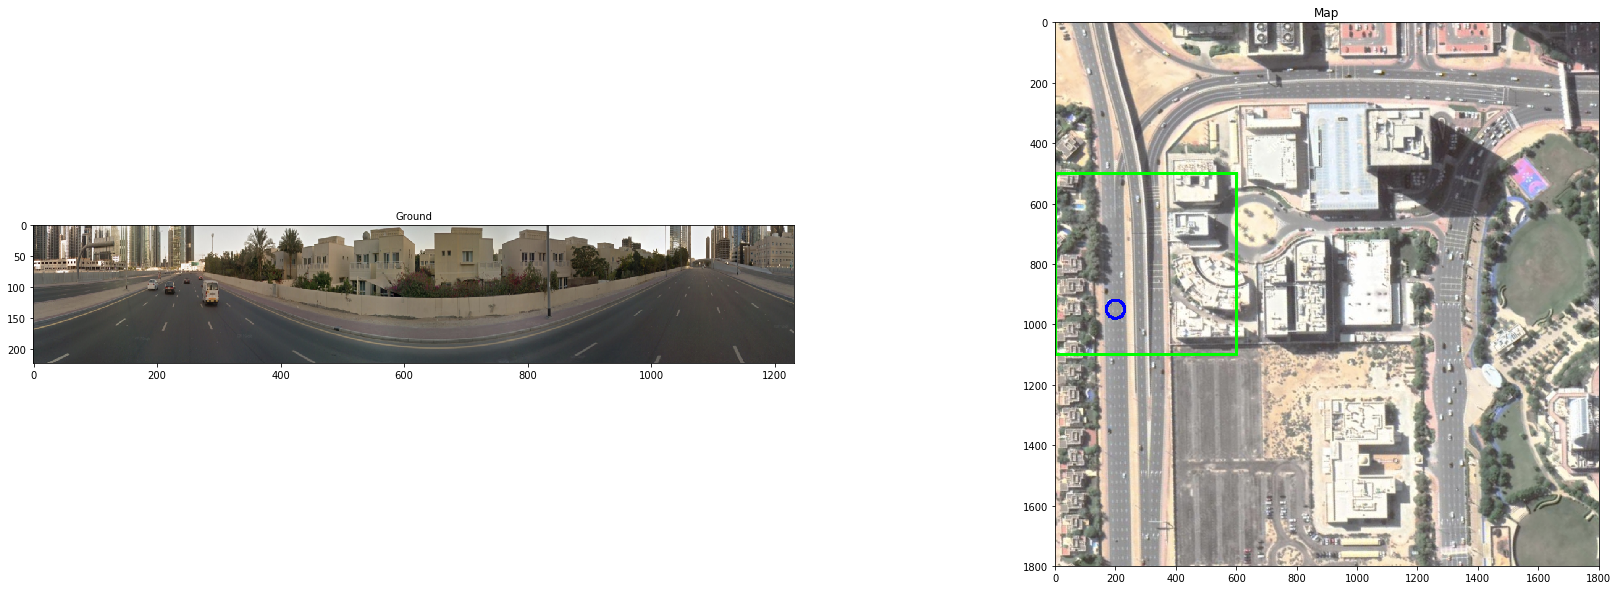

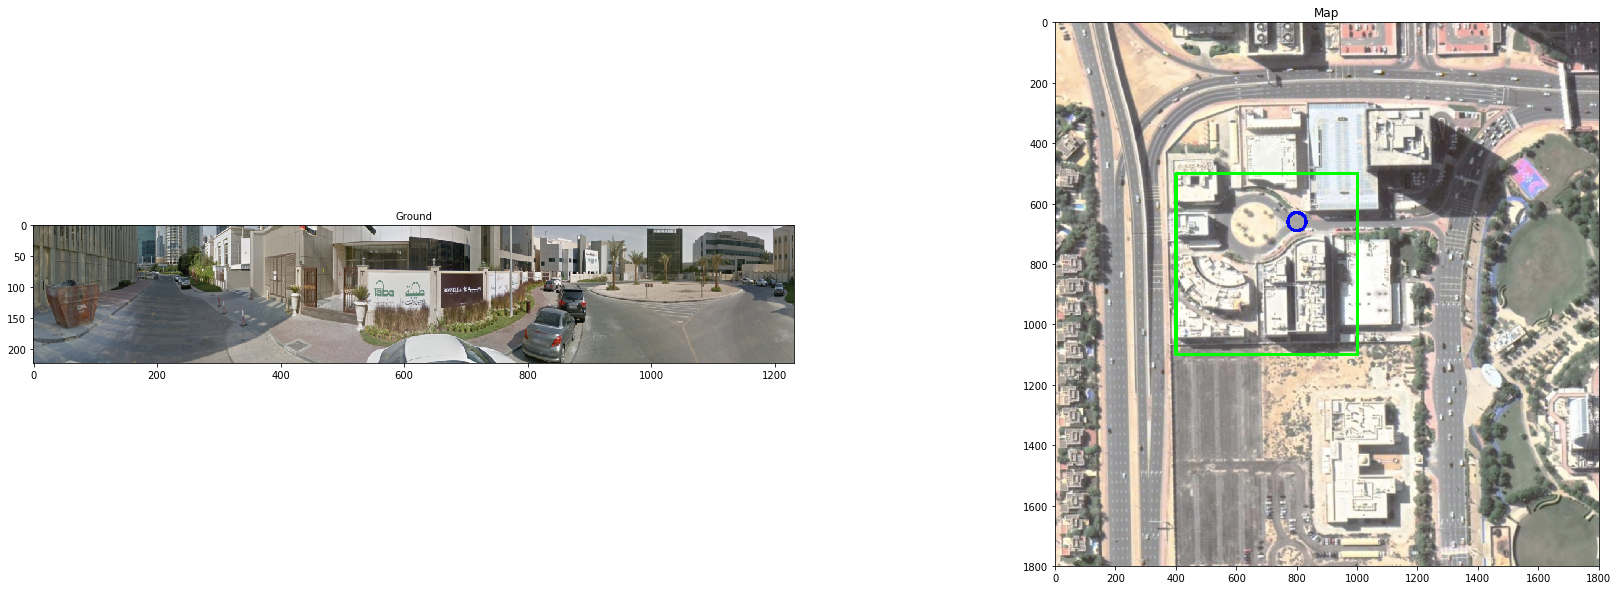

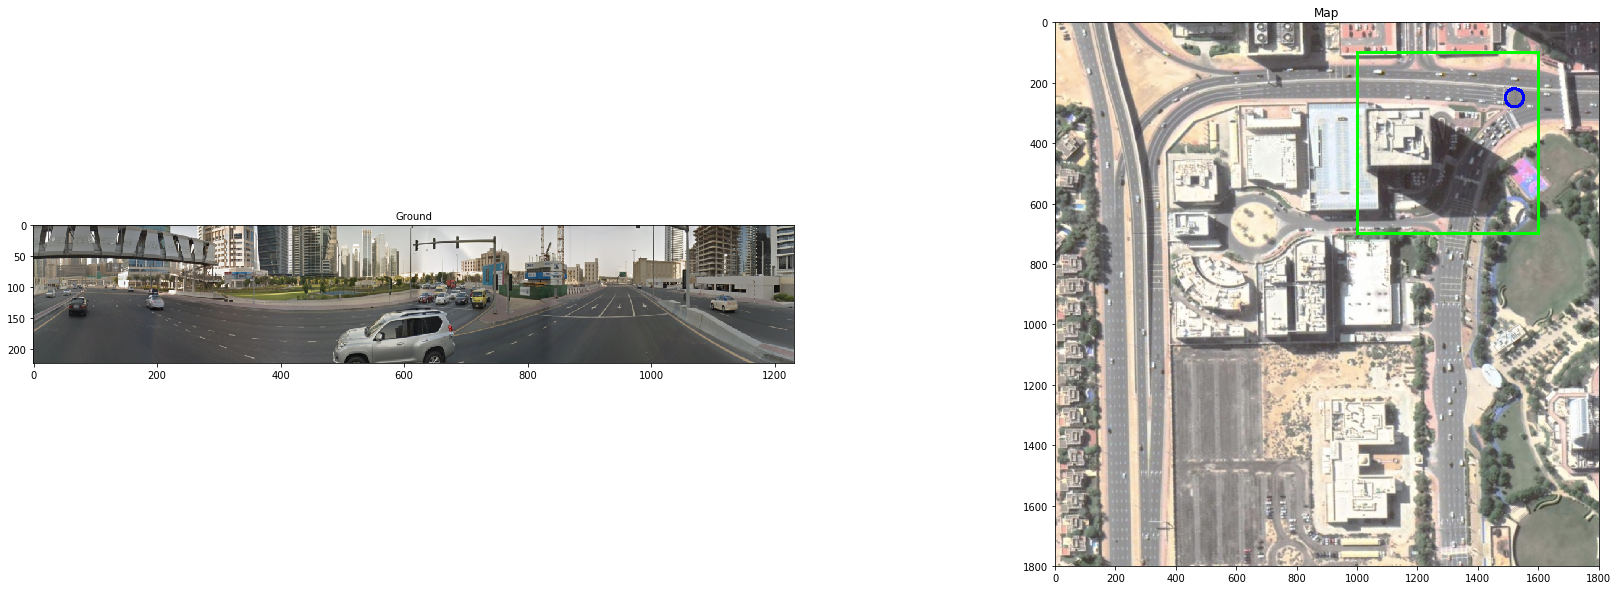

In [13]:
i = 0
ground_truth =[[400,330],[200,950],[800,660],[1520,250]]
for euclidian_dist in euclidean_distances_list:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
    patch_idx = euclidian_dist[0][0]
    print(patch_idx)
    row = math.floor(patch_idx/num_cols)
    col = patch_idx % num_cols
    out = draw_frame(map_resized,row,col)
    cv2.circle(out, (ground_truth[i][0],ground_truth[i][1]), int(30), (0,0,255), thickness=9, lineType=8, shift=0)

    ax1.imshow(ground_images[i])
    ax1.set_title('Ground', fontsize=10)
    ax2.imshow(out)
    ax2.set_title('Map')
    i += 1
#matched_img = match_patch_to_map(satellite_images[euclidian_dist[0][0]])